Predictive Analytics - Anupma Mangla

### Heart Disease Dataset Analysis:

* Problem Statement: To analyze the heart disease dataset to predict presence/absence of heart disease using the given features in dataset.

* Dataset Details:
    - It is taken from kaggle. URL:  https://www.kaggle.com/ronitf/heart-disease-uci
    - Dataset uses the relevant health exam indicators in patients and analyzes their influences on heart disease. The dataset has 14 key attributes.
 
### Steps

* Load the packages
* Load the dataset
* EDA
* Explore type of variables to Identify Regression vs Classification problem
* Chi-square test to determine the relationship between variables
* Prepare, train and test Model
* Random Forest Classification
* k-fold cross-validation
* Hyper-parameter tuning for RF Classifier
* Use other classification models and compare performance


### Load the Packages

In [587]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [588]:
df = pd.read_csv('heart.csv')
print(type(df))
(df.head())

<class 'pandas.core.frame.DataFrame'>


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attributes/ Feature details 

Here is the explaination of the different attributes in the above dataset:

1. Age: age of the patient in years
2. Sex: gender of a patient, 
    * 1 = male
    * 0 = female
3. cp: chest pain type,
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure of a patient (in mm Hg on admission to the hospital)
5. Chol: serum cholesterol in mg/dl
6. Fbs: fasting blood sugar > 120 mg/dl,
    * 1 = true
    * 0 = false
7. restecg : resting electrocardiographic results
8. Thalach: maximum heart rate of a patient
9. exang: exercise induced angina
    * 1 = yes
    * 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
    This is an observation in treadmill ECG stress test used to diagnose coronary artery disease(CAD).  The treadmill electrocardiogram (ECG) stress test is widely used to screen for obstructive coronary artery disease. The presence of ST segment changes, either depression or elevation, on the ECG during the treadmill test often suggests presence of CAD and warrants further management.  CAD is diagnosed as the plaque buildup in the arteries, which move oxygen-rich blood through the heart and lungs
11. Slope: the slope of the peak exercise ST segment
    The slope is the ST segment/ Heart rate slope which is used as a indicator of coronary heart disease.
12. Ca: number of major vessels (0-3) colored by fluoroscopy
13. Thal: Thalassemia is an inherited blood disorder characterized by less hemoglobin and fewer red blood cells in your body than normal.  The type of thalassemia you have depends on the number of gene mutations you inherit from your parents and which part of the hemoglobin molecule is affected by the mutations. The more mutated genes, the more severe your thalassemia. Heart problems such as congestive heart failure and abnormal heart rhythms (arrhythmias) may be associated with severe thalassemia.
    * 3 = normal; 
    * 6 = fixed defect; 
    * 7 = reversible defect
14. Target: The “target” field refers to the presence of heart disease in the patient. It is the dependent variable and rest all the variable are the independent variable.
    * 1 = presence on heart disease
    * 0 = absence of heart disease
     



In [589]:
# rename columns to be expalanatory

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration to get some insights

In [590]:
## Get the keys in dataset
print("Keys : ", df.keys())
print("data.shape : ", df.shape)
print("target.shape : ", df.target.shape) 

Keys :  Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')
data.shape :  (303, 14)
target.shape :  (303,)


In [591]:
## Get data types
print(df.dtypes)


age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object


### Check for missing values

In [592]:
#  Check if any null values
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [593]:
## Get descriptive stats of each feature to look at the distribution of dataset

df.describe()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Dataset with categorical variables

The dataset has 303 observations and 14 attributes. 

From the above attributes and describing the dataset, we can see that there are several categorical variables like sex, chest pain type, fasting blood sugar, exercise induced angina, st_slope, num_major_vessels, thalassemia and target. 

This problem is therefore a classification problem and we will use different classification models to predict the presence/ absence of heart disease.

###  Munge the data and convert the categorical value columns with labels to type category
Find the categorical labels and change dtypes

In [594]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [595]:
df['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

In [596]:
df['fasting_blood_sugar'].value_counts()

0    258
1     45
Name: fasting_blood_sugar, dtype: int64

In [597]:
df['rest_ecg'].value_counts()

1    152
0    147
2      4
Name: rest_ecg, dtype: int64

In [598]:
df['exercise_induced_angina'].value_counts()

0    204
1     99
Name: exercise_induced_angina, dtype: int64

In [599]:
df['st_slope'].value_counts()

2    142
1    140
0     21
Name: st_slope, dtype: int64

In [600]:
df['num_major_vessels'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [601]:
df['thalassemia'].value_counts()

2    166
3    117
1     18
0      2
Name: thalassemia, dtype: int64

### Check for class imbalance

In [602]:
## Get the value count for each target:
## 1 = presence/ 0 = absence of heart disease

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [603]:
## Get the percentage of each class

df['target'].value_counts()/len(df)

1    0.544554
0    0.455446
Name: target, dtype: float64

Based on the above percentages, the heart dataset does not suffer from class imbalance

In [604]:
df['target']= df['target'].replace([1,0], ['yes', 'no'])
df['sex']= df['sex'].replace([1,0], ['male', 'female'])

In [605]:
## convert the categorical value columns with labels to type category

df['sex'] = df['sex'].astype('category')
df['chest_pain_type'] = df['chest_pain_type'].astype('category')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('category')
df['rest_ecg'] = df['rest_ecg'].astype('category')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('category')
df['st_slope'] = df['st_slope'].astype('category')
df['num_major_vessels'] = df['num_major_vessels'].astype('category')
df['thalassemia'] = df['thalassemia'].astype('category')
df['target'] = df['target'].astype('category')

df.dtypes

age                           int64
sex                        category
chest_pain_type            category
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar        category
rest_ecg                   category
max_heart_rate_achieved       int64
exercise_induced_angina    category
st_depression               float64
st_slope                   category
num_major_vessels          category
thalassemia                category
target                     category
dtype: object

In [606]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,yes
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,yes
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,yes


### Chi-Squared test

The chi-squared statistical hypothesis test is used for quantifying the independence of pairs of categorical variables. The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

Hypothesis:
* Null Hypothesis(H0) : There is no relationship between 2 categorical variables. i.e they are independent of each other
* H1 : There is a relationship between 2 categorical variables. i.e they are dependent on each other.

A low p-value, below the chosen significance level, indicates statistical significance, i.e., sufficient evidence to reject the null hypothesis.
A significance level (alpha value) of 0.05 is often used as the cutoff between significant and not-significant results.
https://en.wikipedia.org/wiki/Chi-squared_distribution#Table_of_χ2_values_vs_p-values



In [607]:
# Contingency Table for 2 variables: target and sex

df_sex = df[['sex','target']]
contingency_tbl_sex=pd.crosstab(df_sex["sex"], df_sex["target"])
print('contingency_table:\n',contingency_tbl_sex)


contingency_table:
 target   no  yes
sex             
female   24   72
male    114   93


In [608]:
# Observed Values
Observed_Values = contingency_tbl_sex.values 
print("Observed Values:\n",Observed_Values)

Observed Values:
 [[ 24  72]
 [114  93]]


In [609]:
# Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tbl_sex)

Expected_Values = b[3]
print("Expected Values: \n",Expected_Values)

Expected Values: 
 [[  43.72277228   52.27722772]
 [  94.27722772  112.72277228]]


In [610]:
# Degree of Freedom
no_of_rows=len(contingency_tbl_sex.iloc[0:2,0])
no_of_columns=len(contingency_tbl_sex.iloc[0,0:2])
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom: ",dof)

Degree of Freedom:  1


In [611]:
# Significance Level 5%
alpha=0.05

# chi-square statistic - χ2
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]

print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 23.9143839148


In [612]:
# critical_value
critical_value = chi2.ppf( q=1-alpha, df=dof)
print('critical_value:',critical_value)

critical_value: 3.84145882069


In [613]:
# p-value
p_value= 1 - chi2.cdf(x = chi_square_statistic, df=dof)
print('p-value:',p_value)

p-value: 1.00716420337e-06


In [614]:
print('Significance level: ',alpha)
print('Degree of Freedom: ', dof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 23.9143839148
critical_value: 3.84145882069
p-value: 1.00716420337e-06


In [615]:
# compare chi_square_statistic with critical_value 
# compare p-value to significant value of 0.05, 
# the lower the p-value indicates statistical significance to reject the null hypothesis

if p_value <= alpha:
    print("Reject Null hypothesis, There is a relationship between 2 categorical variables")
else:
    print("Retain Null hypothesis, There is no relationship between 2 categorical variables")
    
if chi_square_statistic >= critical_value:
    print("Reject Null hypothesis, There is a relationship between 2 categorical variables")
else:
    print("Retain Null hypothesis, There is no relationship between 2 categorical variables")
    


Reject Null hypothesis, There is a relationship between 2 categorical variables
Reject Null hypothesis, There is a relationship between 2 categorical variables


### Get relationship between different  variables 
* Define a function to get chi_square test metrics
* Calculate relationship between target and each of the 13 variables


In [616]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(contingency_table, var):
    
    related = False
    
    # Observed Values
    Observed_Values = contingency_table.values 
    #print("\n Observed Values:\n",Observed_Values)
    
    chi_square, p_val, dof, ex = scipy.stats.chi2_contingency(contingency_table)
    
    # Expected Values
    Expected_Values = ex
    #print("\n Expected Values: \n",Expected_Values)

    # Significance Level 5%
    alpha=0.05
    
    # critical_value : percent point function
    critical_value = chi2.ppf( q=1-alpha, df=dof)
    
    print('\nSignificance level: ',alpha)
    print('Degree of Freedom: ', dof)
    print('chi-square statistic:', chi_square)
    print('p-value:', p_val)
    print('critical_value:',critical_value)
    
    if p_val <= alpha:
        print("Reject Null Hypothesis -> There is a relationship between 2 variables")
        related = True
    else:
        print("Retain Null Hypothesis -> There is no relationship between 2 variables")
        
    if chi_square >= critical_value:
        print("Reject Null Hypothesis -> There is a relationship between 2 variables")
        related = True
    else:
        print("Retain Null Hypothesis -> There is no relationship between 2 variables")
          
    print("\n")
    return related
    

In [617]:
# Determine relationship between target and each of 13 variables

feature_list = [x for x in df.columns if x != 'target']
print(feature_list)
dep_vars = []
for feature in feature_list:
    df_feature = df[[feature,'target']]

    print("\n ==> chi_square_test results between variables: target and " + feature)
    contingency_tbl = pd.crosstab(df_feature[feature], df_feature["target"])
    result = chi_square_test(contingency_tbl, feature)
    if result:
        dep_vars.append(feature)
        
    print("Variables with dependency relationship to target: ", dep_vars)
    print("============================\n")
    

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

 ==> chi_square_test results between variables: target and age

Significance level:  0.05
Degree of Freedom:  40
chi-square statistic: 50.129214652
p-value: 0.130912188008
critical_value: 55.7584792789
Retain Null Hypothesis -> There is no relationship between 2 variables
Retain Null Hypothesis -> There is no relationship between 2 variables


Variables with dependency relationship to target:  []


 ==> chi_square_test results between variables: target and sex

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 22.7172270466
p-value: 1.87677762169e-06
critical_value: 3.84145882069
Reject Null Hypothesis -> There is a relationship between 2 variables
Reject Null Hypothesis -> There is a relationship between 2 variables


Variables with depend

### Prepare, train and test the models

In [618]:
# prepare models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,precision_score, recall_score, auc,roc_curve


In [619]:
# One hot encoding
df = pd.get_dummies(df, columns=["sex","target"], drop_first=True)
df.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,sex_male,target_yes
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,0,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,0,1


In [620]:
## Split the data into training and testing 
# Target value
y = df['target_yes']

# all columns except the target
X = df.drop('target_yes', 1)

X.head()

,age,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,sex_male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,0


In [621]:
## Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=456) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


### Random Forest Classifier
* Train and Predict

In [622]:
## Fit the Random Tree classifier to training set
rf = RandomForestClassifier(random_state=456)
rf.fit(X_train, y_train)   # with default settings


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=456, verbose=0, warm_start=False)

In [623]:
y_pred = rf.predict(X_test)

### Model Evaluation

In [624]:
print("Random forest TRAIN score with ",format(rf1.score(X_train, y_train)))
print("Random forest TEST score with ",format(rf1.score(X_test, y_test)))

print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nRF Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nRF Classification Report :\n",classification_report(y_test, y_pred))

Random forest TRAIN score with  0.8553719008264463
Random forest TEST score with  0.8360655737704918

Random Forest Accuracy: 83.61%

RF Confusion Matrix :
 [[22  6]
 [ 4 29]]

RF Classification Report :
              precision    recall  f1-score   support

          0       0.85      0.79      0.81        28
          1       0.83      0.88      0.85        33

avg / total       0.84      0.84      0.84        61



### Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. 
* An area of 1.0 represents a model that made all predictions perfectly. 
* An area of 0.5 represents a model as good as random.

In [625]:
#from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

# area under the curve
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the ROC curve: ",roc_auc)

Area under the ROC curve:  0.832251082251


### Sensitivity and Specificity

ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

Sensitivity is the true positive rate also called the recall. 
* It is the number instances from the positive (first) class that actually predicted correctly.

Specificity is also called the true negative rate. 
* Is the number of instances from the negative class (second) class that were actually predicted correctly.

In [626]:
cm = confusion_matrix(y_test, y_pred)
total=sum(sum(cm))

# Sensitivity: Percentage of positives that are successfully classified as positive
# Sensitivity or Recall = TP/(TP+FN)  

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity/ True positive rate = TP/(TP+FN) : ', sensitivity )

# Specificity: Percentage of negatives that are successfully classified as negatives
# Specificity = TN/(TN+FP)

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity/ True negative rate = TN/(TN+FP) : ', specificity)

Sensitivity/ True positive rate = TP/(TP+FN) :  0.846153846154
Specificity/ True negative rate = TN/(TN+FP) :  0.828571428571


### K-fold Cross-Validation

In [627]:
from sklearn import model_selection

scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=456)
cv_results = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring=scoring)

print("10 Fold accuracy : \n {0}".format(cv_results))
print("Mean Accuracy: {0}".format(cv_results.mean()))
print("Std Accuracy: {0}".format(cv_results.std()))

10 Fold accuracy : 
 [ 0.87096774  0.74193548  0.90322581  0.56666667  0.76666667  0.83333333
  0.76666667  0.83333333  0.8         0.66666667]
Mean Accuracy: 0.7749462365591399
Std Accuracy: 0.09457971853810244


### Hyper-parameter tuning

In [628]:
## Choose a set of hyperparameters for tuning
## and use GridSearchCV to find the best combination of parameters

import time
start = time.time()
criteria = ('gini', 'entropy')
n_estimators = [20, 35, 50, 65]
max_depths = (2,3,4)
min_samples_splits = [2,3,5]

parameters = { 'criterion': criteria,
              'n_estimators': n_estimators,
               'max_depth': max_depths,
               'min_samples_split': min_samples_splits,
             }

rf1 = RandomForestClassifier(random_state=456)
rf_model = GridSearchCV(rf1, parameters,cv = 10,n_jobs = 3)

rf_model.fit(X_train, y_train)
print('Best Parameters using grid search: \n', rf_model.best_params_)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

# Set the rf to the best combination of parameters
rf1 = rf_model.best_estimator_

# Fit the best algorithm to the data. 
rf1.fit(X_train, y_train)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Time taken in grid search:  15.91


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=456, verbose=0, warm_start=False)

In [630]:
y1_pred = rf1.predict(X_test)
cm1 = confusion_matrix(y_test, y1_pred)
print("Random forest TRAIN score with ",format(rf1.score(X_train, y_train)))
print("Random forest TEST score with ",format(rf1.score(X_test, y_test)))

print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y1_pred) * 100))
print("\nConfusion Matrix RF:\n", cm1)
print("\nClassification Report RF:\n",classification_report(y_test, y1_pred))


Random forest TRAIN score with  0.8553719008264463
Random forest TEST score with  0.8360655737704918

Random Forest Accuracy: 83.61%

Confusion Matrix RF:
 [[19  9]
 [ 1 32]]

Classification Report RF:
              precision    recall  f1-score   support

          0       0.95      0.68      0.79        28
          1       0.78      0.97      0.86        33

avg / total       0.86      0.84      0.83        61



### Compare different classification models

In [631]:
# Evaluate each model 

Models = [
    #GLM
    sklearn.linear_model.LogisticRegressionCV(),
    #Nearest Neighbor
    sklearn.neighbors.KNeighborsClassifier(), 
    #Navies Bayes
    sklearn.naive_bayes.GaussianNB(),       
    #Trees    
    sklearn.tree.DecisionTreeClassifier(),
    #Ensemble Methods
    sklearn.ensemble.RandomForestClassifier()    
]

In [632]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=456)

### Compare models using F1-Score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
    F1 = 2 * (precision * recall) / (precision + recall)

In [633]:
# Fit the model and predict

Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for model in Models:
    
    predicted = model.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
   
    Model_name = model.__class__.__name__
    Model_compare.loc[row_index, 'Model Name'] = Model_name
    Model_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(x_train, y_train), 4)
    Model_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(x_test, y_test), 4)
    Model_compare.loc[row_index, 'Model Precission'] = precision_score(y_test, predicted)
    Model_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted)
    Model_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)
    Model_compare.loc[row_index, 'Model F1-score weighted'] = f1_score(y_test, predicted, average='weighted')

    row_index+=1
    
Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)    
Model_compare

,Model Name,Model Train Accuracy,Model Test Accuracy,Model Precission,Model Recall,Model AUC,Model F1-score weighted
4,RandomForestClassifier,0.9876,0.8525,0.815789,0.939394,0.844697,0.850422
0,LogisticRegressionCV,0.8471,0.8361,0.794872,0.939394,0.826840,0.833060
2,GaussianNB,0.8512,0.8361,0.828571,0.878788,0.832251,0.835441
3,DecisionTreeClassifier,1.0000,0.7705,0.756757,0.848485,0.763528,0.768222
1,KNeighborsClassifier,0.7603,0.7213,0.722222,0.787879,0.715368,0.719483


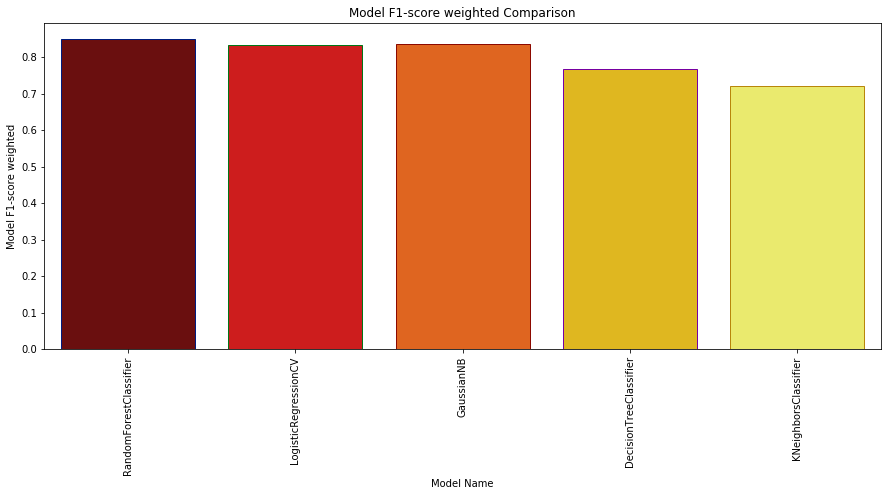

In [634]:
# Plot the models using F1-Score

plt.subplots(figsize=(15,6))
sns.barplot(x="Model Name", y="Model F1-score weighted",data=Model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1-score weighted Comparison')
plt.show()